In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.constants import golden 

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize = (5.0, 5.0/golden)) 

cani = pd.read_csv('cani.csv', sep = ';', decimal=",", parse_dates=True)
cani

,Cartella,IP,GravitaIP,EtaAnni,MORTE,MC,SURVIVALTIME,Terapia,Antiaritmico,PesoKg,VTricuspide,AsxAo,OndaE,OndaEA,FrazEspuls,FrazAccorc,EDVI,ESVI,Allodiast,Allosist
0,S0601,NO,0,10.35,0,NaN,0,2,NO,5.25,0.00,2.50,1.15,0.97,70.0,37.0,78.69,23.75,1.58,0.99
1,C0621,NO,0,15.21,1,1.0,341,3,NO,6.00,0.00,1.61,1.50,1.47,83.0,51.0,130.58,23.88,1.94,0.99
2,B0918,NO,0,15.77,1,1.0,117,3,NO,3.20,0.00,2.50,1.87,2.08,91.0,62.0,180.35,16.22,2.21,0.84
3,R1009,NO,0,13.54,1,1.0,93,4,SI,26.50,0.00,3.07,2.28,2.85,75.0,44.0,234.17,40.15,2.09,1.16
4,R1513,NO,0,10.72,0,NaN,666,3,NO,11.00,0.00,2.54,0.75,0.86,69.0,38.0,139.84,43.89,1.98,1.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,G1006,SI,3,11.35,1,1.0,46,4,NO,8.80,4.51,2.77,1.74,NaN,78.0,46.0,260.51,41.33,2.23,1.21
157,A1403,SI,3,13.39,1,1.0,275,4,NO,8.00,4.54,2.49,NaN,NaN,74.0,41.0,104.55,29.51,1.76,1.03
158,Z1003,SI,3,12.40,1,1.0,43,3,NO,14.00,4.60,2.52,NaN,NaN,77.0,46.0,371.13,57.22,2.54,1.36
159,B1135,SI,3,14.19,1,1.0,269,4,NO,2.50,5.09,3.10,1.51,2.56,79.0,47.0,180.58,38.38,2.21,1.16


In [2]:
#1 Consideriamo l'assunzione di farmaci antiaritmici e la morte per cause cardiache

In [3]:
#1.1 Tabella frequenze assolute di Antiaritmico
antiA_abs = pd.crosstab(index = cani.Antiaritmico, columns = 'Frequenze assolute', colnames = [''])
antiA_abs

,Frequenze assolute
Antiaritmico,
NO,150
SI,11


In [5]:
#1.2 Quanti sono i cani che assumono farmaci antiaritmici ?
len(cani[cani['Antiaritmico'] == 'SI'])

11

In [8]:
#1.3 Con quale valore numerico mettereste in corrispondenza il si e con quale il no ?
print('SI = 1\nNO = 0')

SI = 1
NO = 0


In [9]:
#1.4 Tabella frequenze assolute congiunte di Antiaritmico e MC
antiA_MC = pd.crosstab(index=cani.Antiaritmico, columns = cani.MC, colnames=[''])
antiA_MC

,0.0,1.0
Antiaritmico,,
NO,28,78
SI,0,9


In [11]:
#1.5 Percentuale di cani morti per cause cardiache che assumeva farmaci antiaritmici
app = cani[cani['MC'] == 1]
app2 = app[app['Antiaritmico'] == 'SI']
(len(app2)/len(app))*100

10.344827586206897

In [12]:
#2 Consideriamo SURVIVALTIME

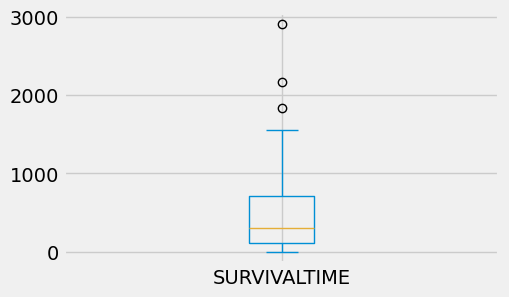

In [13]:
#2.1 Completate il boxplot di SURVIVALTIME coi valori degli estremi
cani.SURVIVALTIME.plot.box()
plt.show()

In [25]:
#2.2 Quanti animali sono compresi all'interno della scatola (estremi inclusi ?)
cani.SURVIVALTIME.quantile(.25), cani.SURVIVALTIME.quantile(.75)
caniQ = cani[(cani['SURVIVALTIME'] >= 113) & (cani['SURVIVALTIME'] <= 711)]
len(caniQ)

81

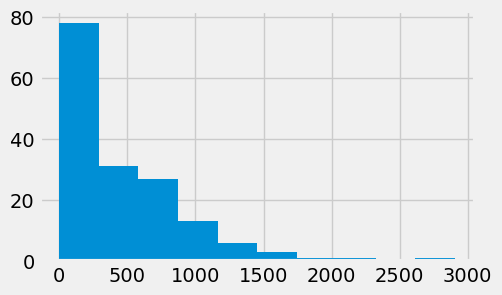

In [31]:
#2.3 Tracciare un grafico diverso dal boxplot che descriva il tempo di sopravvivenza dei cani considerati
cani['SURVIVALTIME'].hist()
plt.show()

In [32]:
#2.4 Modello teorico che descriva la v.a. X = 'tempo sopravvivenza dei cani che frequentano l ambulatorio'
print('Modello esponenziale, come si nota dal grafico prodotto prima.')

Modello esponenziale, come si nota dal grafico prodotto prima.


In [33]:
#2.5 Tempo sopravvivenza medio
cani.SURVIVALTIME.mean()

459.888198757764

In [34]:
#2.6 Deviazione standard tempo di sopravvivenza
cani.SURVIVALTIME.std()

467.1967063479367

In [37]:
#2.7 Il modello che avete proposto presenta uno o più parametri. Fornitene una stima
par = 1 / cani.SURVIVALTIME.mean()
par

0.0021744415331838686